<a href="https://colab.research.google.com/github/ChristeenaGiji/sales-data-exploration/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

from google.colab import files

import pandas as pd
df = pd.read_excel('/content/ICTDAT601_AE_CS1of2_Appx_DataSet1.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2019-11-08 00:00:00,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Australia,Queensland,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2019-11-08 00:00:00,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Australia,Queensland,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2019-06-12 00:00:00,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Australia,ACT,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Australia,ACT,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Australia,ACT,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Sales Analysis

## Import libraries
Here we **import **the necessary *libraries* used in this notebook



In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as plt

In [ ]:
! pip install py3dmol


In [ ]:
import py3Dmol
p=py3Dmol.view(query='mntf:1ycr')
p.setstyle({'cartoon':{'color':'spectrum'}})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/ICTDAT601_AE_CS1of2_Appx_DataSet1.xlsx')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2019-11-08 00:00:00,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Australia,Queensland,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2019-11-08 00:00:00,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Australia,Queensland,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2019-06-12 00:00:00,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Australia,ACT,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Australia,ACT,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2021-10-11 00:00:00,2021-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Australia,ACT,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data cleaning

## Checking missig values

In [ ]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64



## Checking data types

In [ ]:
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

ValueError: day is out of range for month, at position 905

## Cleaning invalid dates


In [ ]:
def find_invalid_dates(date_series):
    invalid_dates = []
    for date in date_series:
        try:
            pd.to_datetime(date, format='%Y-%m-%d', errors='raise')
        except ValueError:
            invalid_dates.append(date)
    return invalid_dates

invalid_order_dates = find_invalid_dates(df['Order Date'])
invalid_ship_dates = find_invalid_dates(df['Ship Date'])

print("Invalid Order Dates:", invalid_order_dates)
print("Invalid Ship Dates:", invalid_ship_dates)

Invalid Order Dates: ['29/02/2019']
Invalid Ship Dates: []


In [ ]:
# Function to safely convert dates and handle errors
def safe_to_datetime(date_series):
    return pd.to_datetime(date_series, errors='coerce')

# Convert 'Order Date' and 'Ship Date' to datetime, setting invalid parsing as NaT
df['Order Date'] = safe_to_datetime(df['Order Date'])
df['Ship Date'] = safe_to_datetime(df['Ship Date'])

# Display rows with NaT dates to understand the extent of the issue
print(df[df['Order Date'].isna() | df['Ship Date'].isna()])

# Drop rows with invalid dates
df = df.dropna(subset=['Order Date', 'Ship Date'])

# Verify that there are no more invalid dates
print(df.isnull().sum())

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
3757    3758  CA-2016-111283        NaT 2019-03-04  Standard Class   

     Customer ID  Customer Name   Segment    Country State Region  \
3757    LC-16870  Lena Cacioppo  Consumer  Australia   NSW   East   

           Product ID         Category Sub-Category Product Name    Sales  \
3757  OFF-AR-10001615  Office Supplies          Art    Newell 34  111.104   

      Quantity  Discount  Profit  
3757         7       0.2  8.3328  
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
#Order date converted to date time data type

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


# Summary statistics

In [ ]:
print(df.describe())

            Row ID                     Order Date  \
count  9993.000000                           9993   
mean   4997.623737  2021-03-21 19:53:17.958571008   
min       1.000000            2019-01-02 00:00:00   
25%    2499.000000            2019-12-23 00:00:00   
50%    4998.000000            2021-04-30 00:00:00   
75%    7496.000000            2022-05-14 00:00:00   
max    9994.000000            2022-12-30 00:00:00   
std    2885.281661                            NaN   

                           Ship Date         Sales     Quantity     Discount  \
count                           9993   9993.000000  9993.000000  9993.000000   
mean   2021-03-17 21:27:15.184628992    229.869885     3.789252     0.156198   
min              2018-01-01 00:00:00      0.444000     1.000000     0.000000   
25%              2019-12-19 00:00:00     17.280000     2.000000     0.000000   
50%              2021-04-28 00:00:00     54.480000     3.000000     0.200000   
75%              2022-05-12 00:00:00    20

In [ ]:
# Information about the dataframe


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9993 non-null   int64         
 1   Order ID       9993 non-null   object        
 2   Order Date     9993 non-null   datetime64[ns]
 3   Ship Date      9993 non-null   datetime64[ns]
 4   Ship Mode      9993 non-null   object        
 5   Customer ID    9993 non-null   object        
 6   Customer Name  9993 non-null   object        
 7   Segment        9993 non-null   object        
 8   Country        9993 non-null   object        
 9   State          9993 non-null   object        
 10  Region         9993 non-null   object        
 11  Product ID     9993 non-null   object        
 12  Category       9993 non-null   object        
 13  Sub-Category   9993 non-null   object        
 14  Product Name   9993 non-null   object        
 15  Sales          9993 non-nu

# Exploratory analysis

## Distribution of Sales

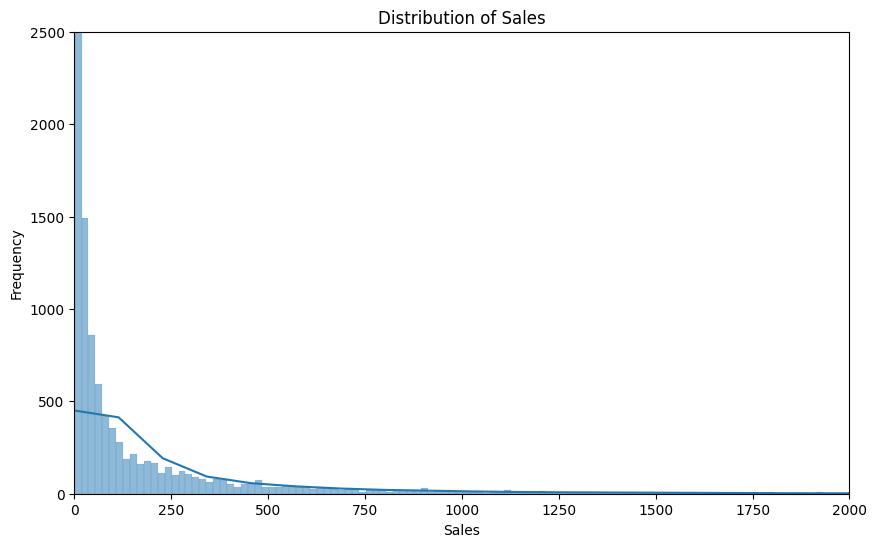

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.xlim(0, 2000)  # Set the x-axis limits as needed
plt.ylim(0, 2500)   # Set the y-axis limits as needed
plt.show()

In [43]:
max_sales = df['Sales'].max()
print("Maximum Sales:", max_sales)
min_sales = df['Sales'].min()
print("Minimum Sales:", min_sales)
median_sales = df['Sales'].median()
print("Median Sales:", median_sales)
MEAN_sales = df['Sales'].mean()
print("Mean Sales:", MEAN_sales)


Maximum Sales: 22638.48
Minimum Sales: 0.44399999999999995
Median Sales: 54.489999999999995
Mean Sales: 229.85800083049833


###Insight

In [ ]:
#The distribution is right-skewed (positively skewed). This means that the majority of sales values are relatively low, with fewer high-value sales.
#Maximum Sales: 22638.5
#Minimum Sales: 0.44
#Median Sales: 54.5
#tailor the business strategies to leverage high-frequency low-value sales and investigate the potential for high-value sales.

**
*  Maximum Sales: 22638.5
*  Minimum Sales: 0.44
*  Median Sales: 54.5
*  The distribution is right-skewed (positively skewed). This means that the majority of sales values are relatively low, with fewer high-value sales.
*   tailor the business strategies to leverage high-frequency low-value sales and investigate the potential for high-value sales **


In [21]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")



Number of outliers: 1167


In [40]:
print(lower_bound)
print(upper_bound)
print(Q1)
print(Q3)
print(IQR)

-271.71000000000004
498.93
17.28
209.94
192.66




1.    25% of the sales are less than or equal to 17.28
2.   75% of the sales data are less than or equal to 209.94
3.


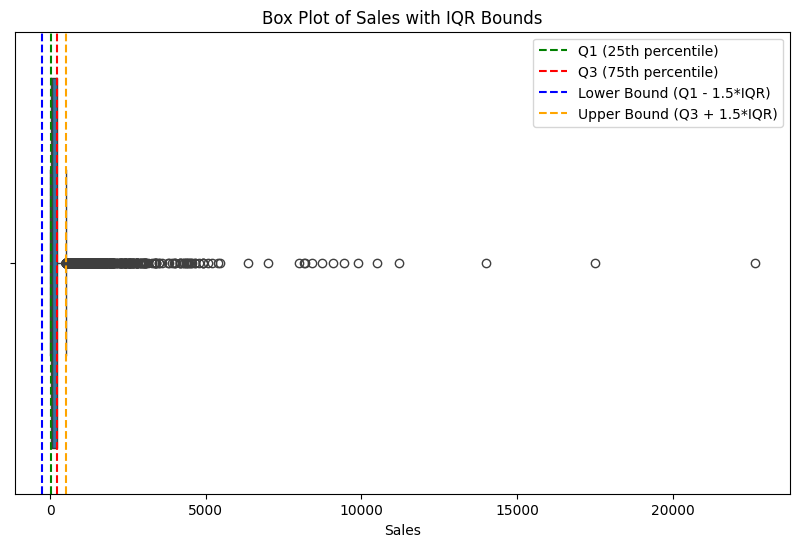

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales with IQR Bounds')
plt.xlabel('Sales')

# Adding lines for Q1, Q3, and IQR bounds
plt.axvline(Q1, color='green', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(Q3, color='red', linestyle='--', label='Q3 (75th percentile)')
plt.axvline(lower_bound, color='blue', linestyle='--', label='Lower Bound (Q1 - 1.5*IQR)')
plt.axvline(upper_bound, color='orange', linestyle='--', label='Upper Bound (Q3 + 1.5*IQR)')

plt.legend()
plt.show()


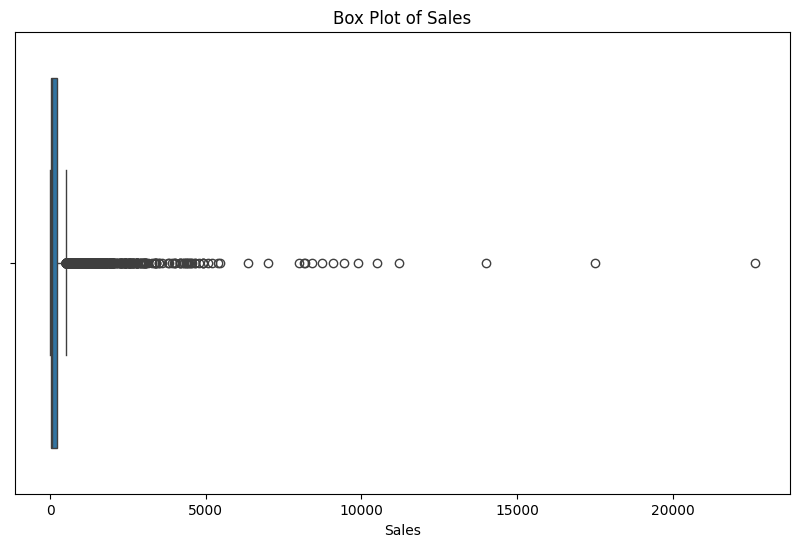

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

In [29]:
#analysing outliers

In [26]:
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
df_no_outliers = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Analyze outliers separately
print(outliers.describe())


            Row ID                      Ship Date         Sales     Quantity  \
count  1167.000000                           1167   1167.000000  1167.000000   
mean   4854.725793  2021-03-19 09:22:40.411311104   1266.052104     5.158526   
min       2.000000            2018-01-01 00:00:00    499.168000     1.000000   
25%    2472.500000            2019-12-30 12:00:00    631.960000     3.000000   
50%    4751.000000            2021-04-11 00:00:00    866.400000     5.000000   
75%    7374.000000            2022-05-06 00:00:00   1346.502500     7.000000   
max    9969.000000            2022-12-31 00:00:00  22638.480000    14.000000   
std    2857.706166                            NaN   1419.107804     2.447331   

          Discount       Profit  
count  1167.000000  1167.000000  
mean      0.145587   160.708308  
min       0.000000 -6599.978000  
25%       0.000000    10.075550  
50%       0.200000   119.686000  
75%       0.200000   270.363600  
max       0.800000  8399.976000  
std    

###analysing data without outliers

In [30]:
df_no_outliers = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

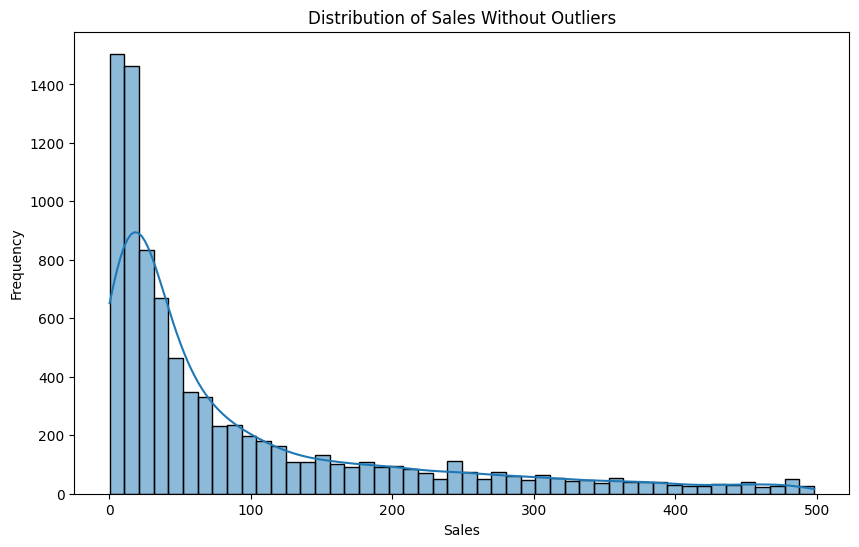

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['Sales'], kde=True)
plt.title('Distribution of Sales Without Outliers')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


In [42]:
median_sales_without_outliers = df_no_outliers['Sales'].median()
print("Median Sales without Outliers:", median_sales_without_outliers)

Median Sales without Outliers: 40.879999999999995


In [36]:
print(df_no_outliers.describe())

            Row ID                      Ship Date        Sales     Quantity  \
count  8827.000000                           8827  8827.000000  8827.000000   
mean   5016.375552  2021-03-17 14:40:46.221819392    92.864853     3.608587   
min       1.000000            2018-01-01 00:00:00     0.444000     1.000000   
25%    2508.500000            2019-12-17 00:00:00    15.008000     2.000000   
50%    5028.000000            2021-05-01 00:00:00    40.880000     3.000000   
75%    7517.500000            2022-05-14 12:00:00   124.225000     5.000000   
max    9994.000000            2022-12-31 00:00:00   498.260000    14.000000   
std    2888.406893                            NaN   114.045078     2.129308   

          Discount       Profit  
count  8827.000000  8827.000000  
mean      0.157606    11.198644  
min       0.000000 -1181.282400  
25%       0.000000     1.702400  
50%       0.200000     7.437600  
75%       0.200000    21.335400  
max       0.800000   240.859500  
std       0.2115

###analyse of Outliers


In [32]:
# Compare outliers with the rest of the data
print("Outliers vs Non-Outliers - Mean Sales")
print(f"Mean Sales (Outliers): {outliers['Sales'].mean()}")
print(f"Mean Sales (Non-Outliers): {df_no_outliers['Sales'].mean()}")

Outliers vs Non-Outliers - Mean Sales
Mean Sales (Outliers): 1266.0521035989718
Mean Sales (Non-Outliers): 92.86485276991051


In [33]:
# Further analysis by category
outliers_by_category = outliers.groupby('Category')['Sales'].describe()
print("Outliers - Sales by Category")
print(outliers_by_category)

Outliers - Sales by Category
                 count         mean          std      min      25%      50%  \
Category                                                                      
Furniture        467.0  1058.077295   666.446067  500.240  615.635  853.092   
Office Supplies  300.0  1252.073427  1202.088368  499.584  659.090  870.195   
Technology       400.0  1519.346700  2041.679498  499.168  648.726  899.960   

                        75%        max  
Category                                
Furniture        1254.46200   4416.174  
Office Supplies  1335.74325   9892.740  
Technology       1443.60900  22638.480  


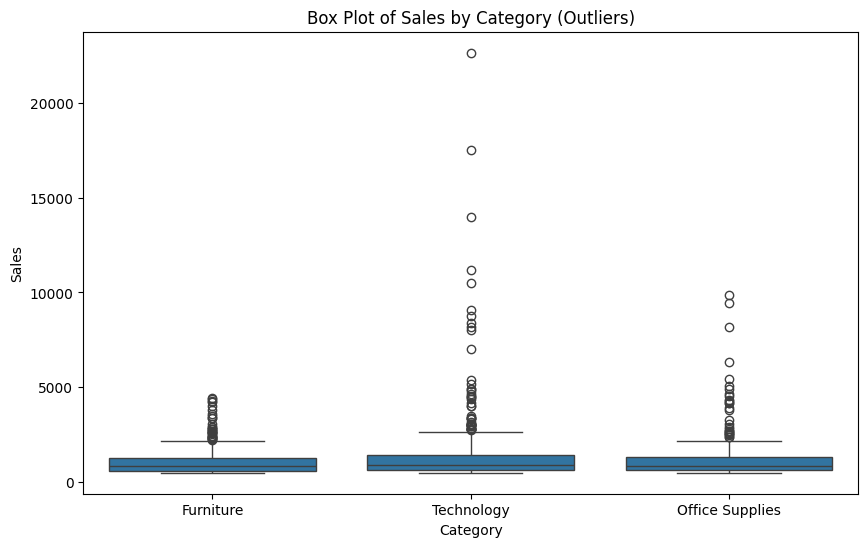

In [34]:
# Visualization of outliers by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=outliers)
plt.title('Box Plot of Sales by Category (Outliers)')
plt.show()

# Get the frequency count of each unique sales value and Find the maximum frequency

In [ ]:
sales_counts = df['Sales'].value_counts()
max_sales_frequency = sales_counts.max()
print("Maximum Frequency of Sales",max_sales_frequency)

Maximum Frequency of Sales 56


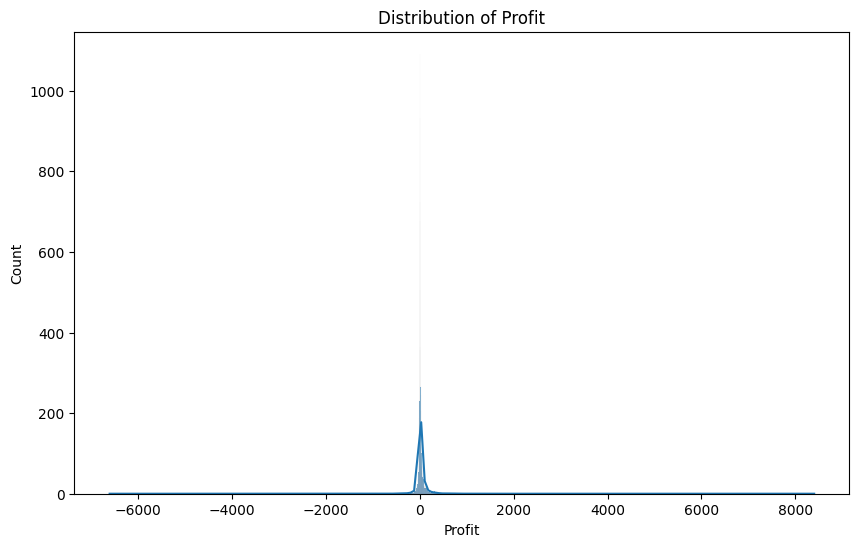

In [ ]:
# Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit')
plt.show()

In [ ]:
# Count plot for each categorical variable
categorical_vars = ['Category', 'Ship Mode', 'Segment', 'Region']

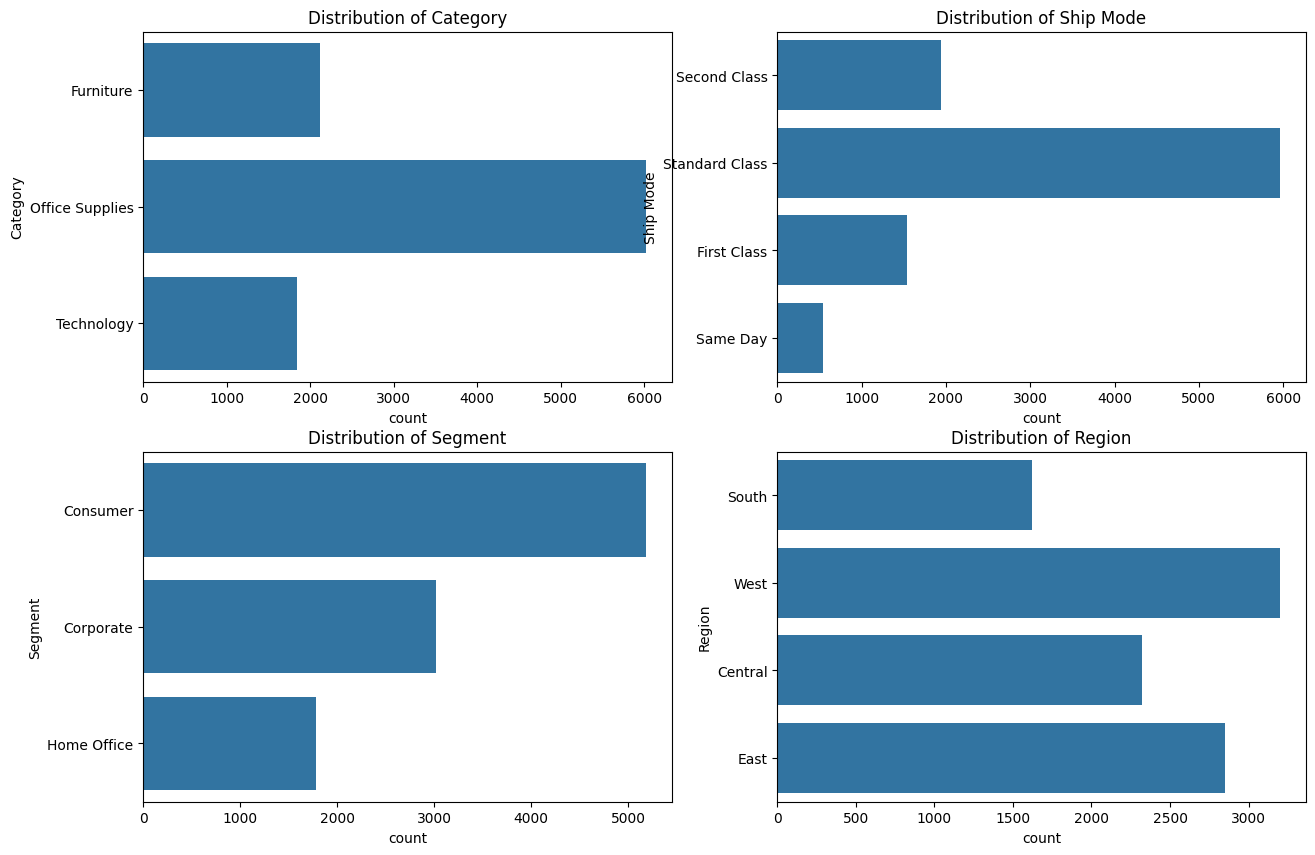

In [ ]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df[var])
    plt.title(f'Distribution of {var}')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

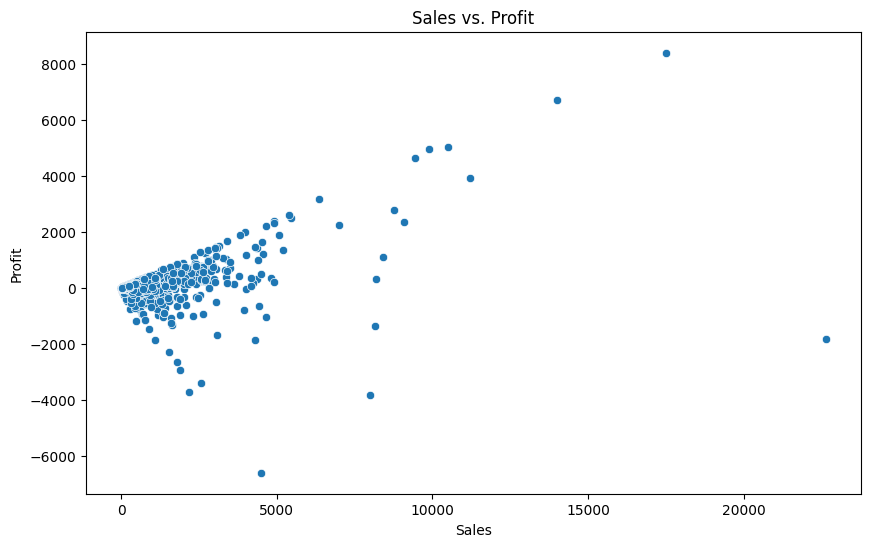

In [ ]:
# Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.show()

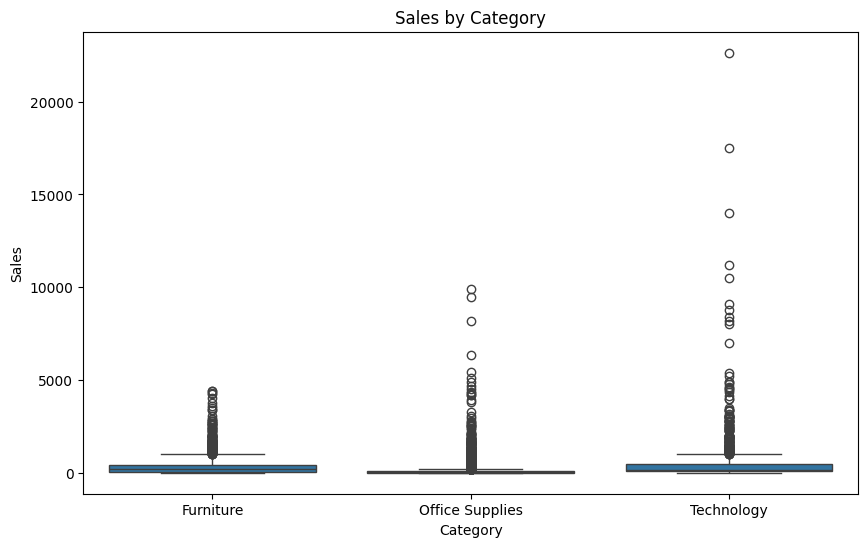

In [ ]:
# Boxplot of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()

In [ ]:
# Sales over time
df.set_index('Order Date', inplace=True)
sales_over_time = df['Sales'].resample('M').sum()

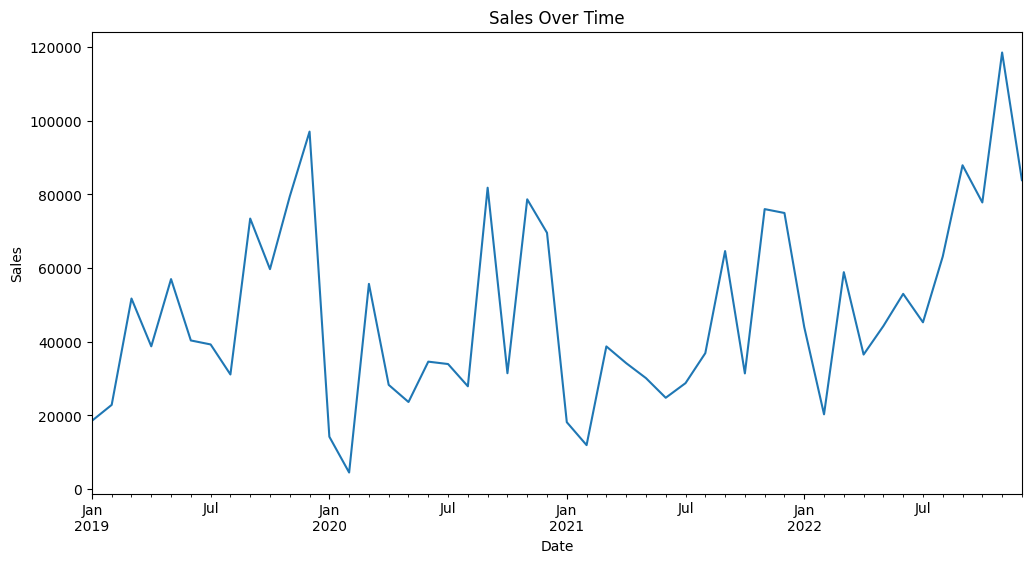

In [ ]:
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

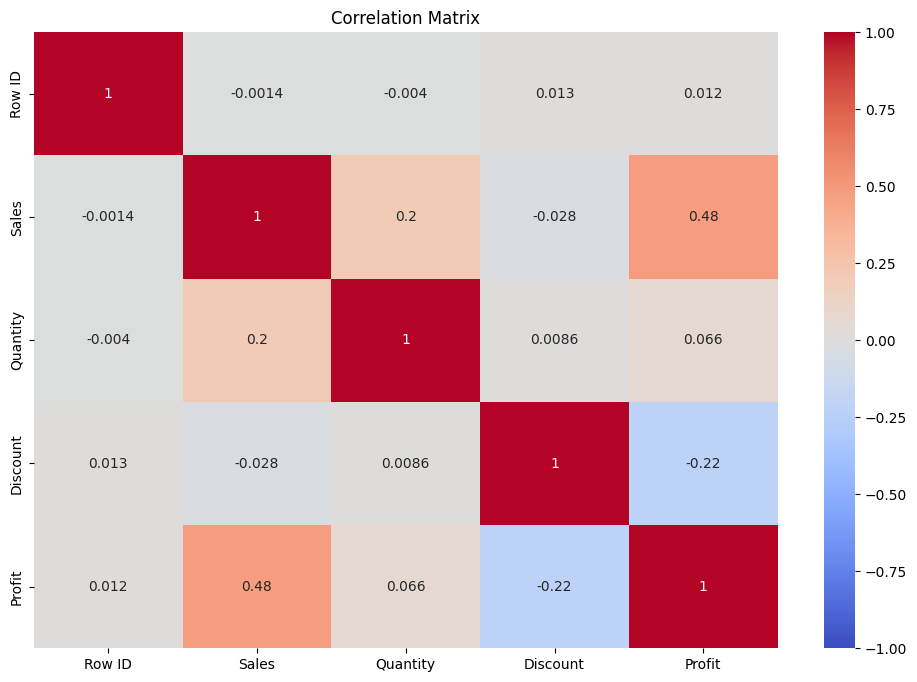

In [ ]:
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
